In [7]:
import typing
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.axes import Axes
import numpy as np


Mějme jednoduchou parabolickou funkci ve 2D.
$f(xy) = 0.5·x^2 + 2·x + y^2 + y + 3$

<img src="./picture_gradientDescent_02.PNG" alt="parabola"  width="300"  height="200"> 

Její 1. derivace dle x:

$\frac {\partial {f(xy)}}{\partial x} = x + 2$

Její 1. derivace dle y:

$\frac {\partial {f(xy)}}{\partial y} = 2·x + 1$



Metoda gradientního sestupu ve 2D  vychází z následujícího vzorečku: \
$x_{new} = x_{old} - \gamma·\nabla{f(x_{old})}$ \
$y_{new} = y_{old} - \gamma·\nabla{f(y_{old})}$ \


In [8]:
f:      typing.Callable[[float, float], float] = lambda xi,yi: 0.5*(xi**2) + 2*(xi**1) + 1*(yi**2) + 1*(yi**0) + 3
dfx:    typing.Callable[[float, float], float] = lambda xi,yi: 1*xi + 2
dfy:    typing.Callable[[float, float], float] = lambda xi,yi: 2*yi + 1

def gradientDescent(
    dfx: typing.Callable[[float], float],
    dfy: typing.Callable[[float], float],
    x0: float,
    y0: float,
    learningCoeff: typing.Optional[float] = 1e-3,
    maxIterations: typing.Optional[int] = 1000,
    residualTarget: typing.Optional[float]= 1e-6,
    ) -> tuple[float, float]:
    """_summary_

    Args:
        dfx (typing.Callable[[float], float]): partial derivative of the function by x 
        dfy (typing.Callable[[float], float]): partial derivative of the function by y
        x0 (float): initial guess's x-coordinate
        y0 (float): initial guess's y-coordinate
        learningCoeff (typing.Optional[float], optional): model constant used to relax the converge. Defaults to 1e-3.
        maxIterations (typing.Optional[int], optional): maximum count of the while loop iterations. Defaults to 1000.
        residualTarget (typing.Optional[float], optional): minimum difference between the iterations, stops the while loop. Defaults to 1e-6.

    Returns:
        tuple[float, float]: returns the root x-y coordinates
    """
    currIter: int = 0
    condition1: typing.Callable[[None], bool] = lambda: currIter < maxIterations
    condition2: typing.Callable[[None], bool] = lambda: abs(dfx(x0,y0)) > residualTarget and abs(dfy(x0,y0)) > residualTarget
    conditions: typing.Callable[[None], bool] = lambda: condition1() and condition2()

    while conditions():
        x_new: int = x0 - learningCoeff * dfx(x0,y0)
        y_new: int = y0 - learningCoeff * dfy(x0,y0)
        currIter += 1
        x0 = x_new
        y0 = y_new
    print(f"Gradient descent iterations: {currIter}")
    return x0,y0

Gradient descent iterations: 766
Root: (-1.997233766116136, -0.49999950552159667)


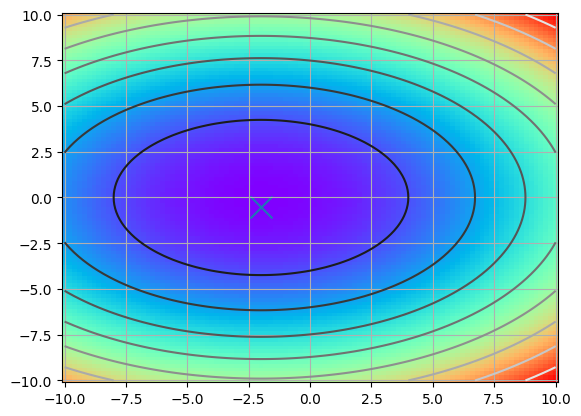

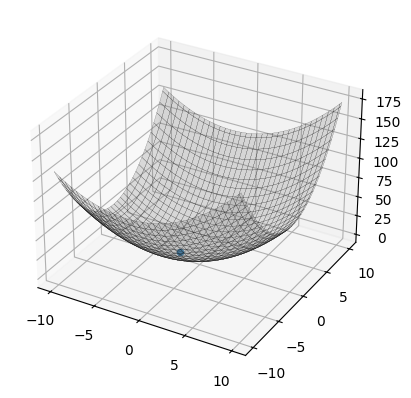

In [9]:
rangeVals: typing.Sequence[float] = np.linspace(-10,10,101)

xx: typing.Sequence[typing.Sequence[float]]
yy: typing.Sequence[typing.Sequence[float]]
xx,yy = np.meshgrid(rangeVals, rangeVals)

fxy: typing.Sequence[typing.Sequence[float]] = 0.5*(xx**2) + 2*(xx**1) + 1*(yy**2) + 1*(yy**0) + 3

initialGuessX: float = 4.1
initialGuessy: float = 2.1
resultRoot: float = gradientDescent(dfx=dfx, dfy=dfy, x0= initialGuessX, y0= initialGuessy, learningCoeff=0.01, maxIterations=1000)
print(f"Root: {resultRoot}")

plt.pcolormesh(xx,yy,fxy, cmap="rainbow")
plt.contour(xx,yy,fxy, levels=10, cmap="gray")
plt.scatter([resultRoot[0]], [resultRoot[1]], marker="x", s=250)
plt.grid()
plt.show()

ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(xx, yy, fxy, facecolor=(0.5, 0.5, 0.5, 0.25), linewidth=0.1, edgecolor= "black")
ax.scatter([resultRoot[0]],
            [resultRoot[1]],
            [0.5*(resultRoot[0]**2) + 2*(resultRoot[0]**1) + 1*(resultRoot[1]**2) + 1*(resultRoot[1]**0) + 3]
            )

